In [204]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
# Display all of the columns
pd.set_option('display.max_columns', None)

In [205]:
# Raw URL of the database file on GitHub
url = 'https://github.com/BFletchall/Project-4-Group-4-Machine-Learning/raw/main/claimed_time.db'
# Download the database file
r = requests.get(url)
with open('claimed_time.db', 'wb') as f:
    f.write(r.content)
# Connect to the SQLite database
conn = sqlite3.connect('claimed_time.db')
# Query data from the database table
query = "SELECT * FROM claimed_table"
# Read data into DataFrame
df = pd.read_sql(query, conn)
# Close the database connection
conn.close()
# Display the first few rows of the DataFrame
df.head()

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0


In [206]:
df.columns

Index(['NumberWithDash', 'EPM_ProductionControlItemID', 'EPM_MainMark',
       'EPM_InstanceNumber', 'Assembly_MainPieceProductionCode',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_MainPartFinishDescr',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalHours_ThisLaborGroup'],
      dtype='object')

In [207]:
# Convert Assembly_EstTotalHours_ThisLaborGroup from hours to seconds
# Fill NaN values in Assembly_EstTotalHours_ThisLaborGroup with 0
df['Assembly_EstTotalHours_ThisLaborGroup'].fillna(0, inplace=True)

# Convert Assembly_EstTotalHours_ThisLaborGroup from hours to seconds
df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'] * 3600

df

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,328,0.0,0.0
11228,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Weld,9782,0.0,0.0
11229,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Fab/Layout,9133,0.0,0.0
11230,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,92,0.0,0.0


In [208]:
df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalSeconds_ThisLaborGroup'].replace(0., np.nan)
df

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0,NaN
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,NaN
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0,NaN
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,NaN
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,328,0.0,NaN
11228,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Weld,9782,0.0,NaN
11229,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Fab/Layout,9133,0.0,NaN
11230,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,92,0.0,NaN


In [209]:
df_reduce =df.drop(columns=['EPM_MainMark', 'Assembly_EstTotalHours_ThisLaborGroup', 'NumberWithDash','Assembly_SurfaceAreaEachSqFt','Assembly_MainPartFinishDescr','Assembly_EstTotalSeconds_ThisLaborGroup'], inplace=False)
df_reduce

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment
0,870038,1,S.S. TUBE STEEL,2.81,39.575,HSS,4 x 2 x 0.25,1,1,Fab/Layout,142
1,870040,1,S.S. TUBE STEEL,7.91,112.116,HSS,4 x 2 x 0.25,2,1,Fab/Layout,124
2,870040,1,S.S. TUBE STEEL,7.91,112.116,HSS,4 x 2 x 0.25,2,1,Weld,47
3,870040,2,S.S. TUBE STEEL,7.91,112.116,HSS,4 x 2 x 0.25,2,1,Fab/Layout,124
4,870040,2,S.S. TUBE STEEL,7.91,112.116,HSS,4 x 2 x 0.25,2,1,Weld,48
...,...,...,...,...,...,...,...,...,...,...,...
11227,901310,1,STAIR STRINGER,8.22,370.278,C,8 x 11.5,2,17,Material Handling,328
11228,901310,1,STAIR STRINGER,8.22,370.278,C,8 x 11.5,2,17,Weld,9782
11229,901310,2,STAIR STRINGER,8.22,370.278,C,8 x 11.5,2,17,Fab/Layout,9133
11230,901310,2,STAIR STRINGER,8.22,370.278,C,8 x 11.5,2,17,Material Handling,92


In [210]:
df_reduce.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPieceProductionCode', 'Assembly_MainPartLengthFt',
       'Assembly_WeightEachLbs', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_TotalQuantityInJob',
       'Assembly_NumSmallParts', 'EPM_AdjustedStationName',
       'TimeInSeconds_ThisWorkSegment'],
      dtype='object')

In [211]:
# Determine the number of unique values in each column.
unique_values = df_reduce.nunique()
print(unique_values)

EPM_ProductionControlItemID         2682
EPM_InstanceNumber                   851
Assembly_MainPieceProductionCode      62
Assembly_MainPartLengthFt           1161
Assembly_WeightEachLbs              2135
Assembly_MainPartShape                19
Assembly_MainPartDimension           419
Assembly_TotalQuantityInJob           70
Assembly_NumSmallParts                92
EPM_AdjustedStationName                8
TimeInSeconds_ThisWorkSegment       3323
dtype: int64


In [212]:
# Look at job_TYPE value counts for binning
#job_type_counts = df_reduce['Assembly_MainPieceProductionCode'].value_counts()
#print(job_type_counts)

In [213]:
# Choose a cutoff value and create a list of job types to be replaced
# use the variable name `job_types_to_replace`
# cutoff_value = 65

# job_types_to_replace = [app for app, count in job_type_counts.items() if count < cutoff_value]

# Replace in dataframe
# for app in job_types_to_replace:
#     df_reduce['Assembly_MainPieceProductionCode'] =  df_reduce['Assembly_MainPieceProductionCode'].replace(app,"Other")

# Check to make sure binning was successful
# df_reduce['Assembly_MainPieceProductionCode'].value_counts()

In [214]:
# Convert categorical data to numeric with `pd.get_dummies`
df_reduce_encoded = pd.get_dummies(df_reduce)
df_reduce_encoded

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_MainPieceProductionCode_ALUM ANGLE,Assembly_MainPieceProductionCode_ALUM BEAM,Assembly_MainPieceProductionCode_ALUM CHANNEL,Assembly_MainPieceProductionCode_ALUM CHKD PLATE,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PIPE LADDER,Assembly_MainPieceProductionCode_ALUM PIPE SLEEVE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ALUM TUBE COLUMN,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_BRACE,Assembly_MainPieceProductionCode_BRACKET,Assembly_MainPieceProductionCode_Backer Bar,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_CHK PLATE,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_DOOR PLATE,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_EMBED ANGLE,Assembly_MainPieceProductionCode_EMBED PLATE,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_GALV. STRINGER,Assembly_MainPieceProductionCode_GUSSET PL,Assembly_MainPieceProductionCode_H BRACE,Assembly_MainPieceProductionCode_HSS STRUT,Assembly_MainPieceProductionCode_INFILL,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PIPE HANDRAIL,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_S.S. ANGLE,Assembly_MainPieceProductionCode_S.S. BENT PLATE,Assembly_MainPieceProductionCode_S.S. EMBED ANGLE,Assembly_MainPieceProductionCode_S.S. PLATE,Assembly_MainPieceProductionCode_S.S. PLATE LADDER,Assembly_MainPieceProductionCode_S.S. TUBE STEEL,Assembly_MainPieceProductionCode_SHIM,Assembly_MainPieceProductionCode_SHIM PLATE,Assembly_MainPieceProductionCode_SHIM STACK,Assembly_MainPieceProductionCode_SS PLATE,Assembly_MainPieceProductionCode_STAIR STRINGER,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS,Assembly_MainPieceProductionCode_TRUSS CHORD,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_TUBE STEEL BRIDGING,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPieceProductionCode_WASHER,Assembly_MainPieceProductionCode_WT,Assembly_MainPieceProductionCode_WT SHEAR COLLECTOR,Assembly_MainPieceProductionCode_WT TOP TRUSS,Assembly_MainPieceProductionCode_WT TRUSS,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AHSS,Assembly_MainPartShape_AL,Assembly_MainPartShape_ALB,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_CHKD_PLT,Assembly_MainPartShape_FB,Assembly_MainPartShape_HP,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_S,Assembly_MainPartShape_W,Assembly_MainPartShape_WT,Assembly_MainPartDimension_1 1/2 x 1 1/2 x 1/4,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1 3/4 x 1 3/4 x 1/4,Assembly_MainPartDimension_1 x 12 5/8 §,Assembly_MainPartDimension_1 x 15 1/2,Assembly_MainPartDimension_1 x 15 5/16,Assembly_MainPartDimension_1 x 17 11/16,Assembly_MainPartDimension_1 x 4 1/2,Assembly_MainPartDimension_1/2 x 10,Assembly_MainPartDimension_1/2 x 12,Assembly_MainPartDimension_1/2 x 15,Assembly_MainPartDimension_1/2 x 2,Assembly_

In [215]:
X = df_reduce_encoded.copy()
X.drop("TimeInSeconds_ThisWorkSegment", axis=1, inplace=True)
X.head()

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,Assembly_MainPieceProductionCode_ALUM ANGLE,Assembly_MainPieceProductionCode_ALUM BEAM,Assembly_MainPieceProductionCode_ALUM CHANNEL,Assembly_MainPieceProductionCode_ALUM CHKD PLATE,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PIPE LADDER,Assembly_MainPieceProductionCode_ALUM PIPE SLEEVE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ALUM TUBE COLUMN,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_BRACE,Assembly_MainPieceProductionCode_BRACKET,Assembly_MainPieceProductionCode_Backer Bar,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_CHK PLATE,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_DOOR PLATE,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_EMBED ANGLE,Assembly_MainPieceProductionCode_EMBED PLATE,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_GALV. STRINGER,Assembly_MainPieceProductionCode_GUSSET PL,Assembly_MainPieceProductionCode_H BRACE,Assembly_MainPieceProductionCode_HSS STRUT,Assembly_MainPieceProductionCode_INFILL,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PIPE HANDRAIL,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_S.S. ANGLE,Assembly_MainPieceProductionCode_S.S. BENT PLATE,Assembly_MainPieceProductionCode_S.S. EMBED ANGLE,Assembly_MainPieceProductionCode_S.S. PLATE,Assembly_MainPieceProductionCode_S.S. PLATE LADDER,Assembly_MainPieceProductionCode_S.S. TUBE STEEL,Assembly_MainPieceProductionCode_SHIM,Assembly_MainPieceProductionCode_SHIM PLATE,Assembly_MainPieceProductionCode_SHIM STACK,Assembly_MainPieceProductionCode_SS PLATE,Assembly_MainPieceProductionCode_STAIR STRINGER,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS,Assembly_MainPieceProductionCode_TRUSS CHORD,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_TUBE STEEL BRIDGING,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPieceProductionCode_WASHER,Assembly_MainPieceProductionCode_WT,Assembly_MainPieceProductionCode_WT SHEAR COLLECTOR,Assembly_MainPieceProductionCode_WT TOP TRUSS,Assembly_MainPieceProductionCode_WT TRUSS,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AHSS,Assembly_MainPartShape_AL,Assembly_MainPartShape_ALB,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_CHKD_PLT,Assembly_MainPartShape_FB,Assembly_MainPartShape_HP,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_S,Assembly_MainPartShape_W,Assembly_MainPartShape_WT,Assembly_MainPartDimension_1 1/2 x 1 1/2 x 1/4,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1 3/4 x 1 3/4 x 1/4,Assembly_MainPartDimension_1 x 12 5/8 §,Assembly_MainPartDimension_1 x 15 1/2,Assembly_MainPartDimension_1 x 15 5/16,Assembly_MainPartDimension_1 x 17 11/16,Assembly_MainPartDimension_1 x 4 1/2,Assembly_MainPartDimension_1/2 x 10,Assembly_MainPartDimension_1/2 x 12,Assembly_MainPartDimension_1/2 x 15,Assembly_MainPartDimension_1/2 x 2,Assembly_MainPartDimension_1/2 x 22,Ass

In [216]:
y = df_reduce_encoded['TimeInSeconds_ThisWorkSegment'].ravel()
y[:5]

array([142, 124,  47, 124,  48], dtype=int64)

In [217]:
# Preview the data
print("Features Shape:",X.shape)
print("Targe Shape:", y.shape)

Features Shape: (11232, 514)
Targe Shape: (11232,)


In [218]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [219]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [220]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

In [221]:
X_scaler

StandardScaler()

In [222]:
# Scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [223]:
X_test_scaled

array([[-0.07913914, -0.34639258, -0.58628525, ..., -0.10391889,
        -0.17124694, -0.49279255],
       [-0.07983303, -0.34639258, -0.5099581 , ..., -0.10391889,
        -0.17124694, -0.49279255],
       [-0.55032938, -0.3350299 , -0.94677011, ..., -0.10391889,
        -0.17124694, -0.49279255],
       ...,
       [ 1.26441849, -0.34260502, -0.81618631, ..., -0.10391889,
        -0.17124694, -0.49279255],
       [ 1.25446816, -0.33881746, -0.60191852, ..., -0.10391889,
        -0.17124694, -0.49279255],
       [ 1.22921071, -0.34260502, -0.52375216, ..., -0.10391889,
        -0.17124694, -0.49279255]])

# Fitting the Random Forest Model

In [224]:
# Instantiate the Random Forest Regression model
rf_reg = RandomForestRegressor()

In [225]:
# Fit the model to the training data
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [227]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

In [228]:
# Evaluate the model
print("Random Forest Regression Model Score (R^2):", rf_reg.score(X_test_scaled, y_test))
print("Random Forest Regression Mean Absolute Error:", np.mean(np.abs(y_pred_rf - y_test)))

Random Forest Regression Model Score (R^2): -0.8429246095177765
Random Forest Regression Mean Absolute Error: 1621.188611704653


In [53]:
# Display feature importances
feature_importances = rf_reg.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

Feature Importances:
EPM_ProductionControlItemID: 0.09359851841901896
EPM_InstanceNumber: 0.013519164222684822
Assembly_MainPartLengthFt: 0.04029304196873773
Assembly_WeightEachLbs: 0.3417568299663045
Assembly_TotalQuantityInJob: 0.003400798826711144
Assembly_NumSmallParts: 0.1818460002307567
Assembly_MainPieceProductionCode_ALUM ANGLE: 3.56908910405414e-06
Assembly_MainPieceProductionCode_ALUM CHANNEL: 6.672253770061314e-05
Assembly_MainPieceProductionCode_ALUM PLATE: 9.214444924176921e-05
Assembly_MainPieceProductionCode_ALUM STRINGER: 4.2176541521609574e-06
Assembly_MainPieceProductionCode_ANGLE: 5.683341127643387e-06
Assembly_MainPieceProductionCode_BEAM: 0.0009715947460702783
Assembly_MainPieceProductionCode_BENT PLATE: 1.6881533874868318e-05
Assembly_MainPieceProductionCode_BOLLARD: 3.044280974066306e-07
Assembly_MainPieceProductionCode_Backer Bar: 2.1140451976168204e-10
Assembly_MainPieceProductionCode_CHANNEL: 5.6375122093122574e-05
Assembly_MainPieceProductionCode_COLUMN: 0.00

In [22]:
# Create a DataFrame with feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Exclude 'TimeInSeconds_ThisWorkSegment' and 'Assembly_EstTotalSeconds_ThisLaborGroup'
top_twelve_features = feature_importance_df[(feature_importance_df['Feature'] != 'TimeInSeconds_ThisWorkSegment') & 
                                            (feature_importance_df['Feature'] != 'Assembly_EstTotalSeconds_ThisLaborGroup')]

# Sort the DataFrame by importance and select top 12 features
top_twelve_features = top_twelve_features.nlargest(12, 'Importance')

# Plot top twelve features
top_twelve_features.hvplot.barh(x='Feature', y='Importance', title='Top Twelve Features by Importance', rot=0, color='blue', legend=False, width=900, height=400)


:Bars   [Feature]   (Importance)

# Predict and Plot

In [57]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)
# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
predictions.head()
# Add columns from X_test to add feature detail
predictions = pd.concat([predictions, X_test], axis=1)
# Add another column
predictions['Difference'] = predictions['Actual'] - predictions['Predicted']
predictions.head(15)

,Actual,Predicted,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,TimeInSeconds_ThisWorkSegment,Assembly_MainPieceProductionCode_ALUM ANGLE,Assembly_MainPieceProductionCode_ALUM BEAM,Assembly_MainPieceProductionCode_ALUM CHANNEL,Assembly_MainPieceProductionCode_ALUM CHKD PLATE,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ALUM PIPE,Assembly_MainPieceProductionCode_ALUM PIPE LADDER,Assembly_MainPieceProductionCode_ALUM PIPE SLEEVE,Assembly_MainPieceProductionCode_ALUM PLATE,Assembly_MainPieceProductionCode_ALUM STRINGER,Assembly_MainPieceProductionCode_ALUM TUBE COLUMN,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_BRACE,Assembly_MainPieceProductionCode_BRACKET,Assembly_MainPieceProductionCode_Backer Bar,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_CHK PLATE,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_CRANE GIRDER,Assembly_MainPieceProductionCode_DOOR PLATE,Assembly_MainPieceProductionCode_EMBED,Assembly_MainPieceProductionCode_EMBED ANGLE,Assembly_MainPieceProductionCode_EMBED PLATE,Assembly_MainPieceProductionCode_FRAME,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_GALV. STRINGER,Assembly_MainPieceProductionCode_GUSSET PL,Assembly_MainPieceProductionCode_H BRACE,Assembly_MainPieceProductionCode_HSS STRUT,Assembly_MainPieceProductionCode_INFILL,Assembly_MainPieceProductionCode_PIPE,Assembly_MainPieceProductionCode_PIPE HANDRAIL,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_PLATE WASHER,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_S.S. ANGLE,Assembly_MainPieceProductionCode_S.S. BENT PLATE,Assembly_MainPieceProductionCode_S.S. EMBED ANGLE,Assembly_MainPieceProductionCode_S.S. PLATE,Assembly_MainPieceProductionCode_S.S. PLATE LADDER,Assembly_MainPieceProductionCode_S.S. TUBE STEEL,Assembly_MainPieceProductionCode_SHIM,Assembly_MainPieceProductionCode_SHIM PLATE,Assembly_MainPieceProductionCode_SHIM STACK,Assembly_MainPieceProductionCode_SS PLATE,Assembly_MainPieceProductionCode_STAIR STRINGER,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TREAD,Assembly_MainPieceProductionCode_TRUSS,Assembly_MainPieceProductionCode_TRUSS CHORD,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPieceProductionCode_TUBE STEEL BRIDGING,Assembly_MainPieceProductionCode_V-BRACE,Assembly_MainPieceProductionCode_WASHER,Assembly_MainPieceProductionCode_WT,Assembly_MainPieceProductionCode_WT SHEAR COLLECTOR,Assembly_MainPieceProductionCode_WT TOP TRUSS,Assembly_MainPieceProductionCode_WT TRUSS,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AHSS,Assembly_MainPartShape_AL,Assembly_MainPartShape_ALB,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_CHKD_PLT,Assembly_MainPartShape_FB,Assembly_MainPartShape_HP,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_S,Assembly_MainPartShape_W,Assembly_MainPartShape_WT,Assembly_MainPartDimension_1 1/2 x 1 1/2 x 1/4,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1 3/4 x 1 3/4 x 1/4,Assembly_MainPartDimension_1 x 12 5/8 §,Assembly_MainPartDimension_1 x 15 1/2,Assembly_MainPartDimension_1 x 15 5/16,Assembly_MainPartDimension_1 x 17 11/16,Assembly_MainPartDimension_1 x 4 1/2,Assembly_MainPartDimension_1/2 x 10,Assembly_MainPartDimension_1/2 x 12,Assembly_MainPartDimension_1/2 x 15,Assembly_MainPartDimension_

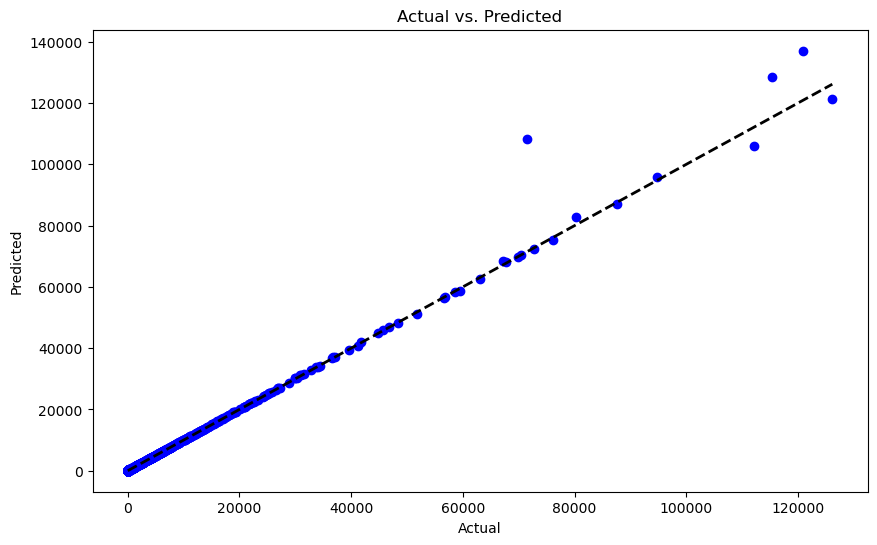

In [58]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [59]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression Model Score (R^2):", r2)
print("Random Forest Regression Mean Absolute Error:", mae)

Random Forest Regression Model Score (R^2): 0.990213362323627
Random Forest Regression Mean Absolute Error: 35.05806267806268


- The R-squared score of 0.99 indicates that approximately 99% of the variance in the target variable can be explained by the features in the model.
- 
The Mean Absolute Error (MAE) of 31.42 seconds indicates that, on average, the model's predictions are off by approximately 31.43 seconds.

In [60]:
#Export Predictions to csv to use for analysis
predictions.to_csv('../analysis/predictions.csv', index=False)

# Random Forest Classifer

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [62]:
# Convert TimeInSeconds_ThisWorkSegment to categorical variable
y_class = pd.qcut(df_reduce_encoded['TimeInSeconds_ThisWorkSegment'], q=5, labels=[1, 2, 3, 4, 5])

In [63]:
# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [64]:
# Scale the features
scaler_class = StandardScaler()
X_train_scaled_class = scaler_class.fit_transform(X_train_class)
X_test_scaled_class = scaler_class.transform(X_test_class)

In [65]:
# Instantiate the Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=500, random_state=78)

In [ ]:
# Fit the model to the training data
rf_clf.fit(X_train_scaled_class, y_train_class)

In [ ]:
# Predict the target values for the test set
y_pred_rf_class = rf_clf.predict(X_test_scaled_class)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_rf_class)
print("Random Forest Classifier Accuracy:", accuracy)

# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_class, y_pred_rf_class)

# Define labels for the confusion matrix
labels = [1, 2, 3, 4, 5]

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Display results
print("Confusion Matrix:")
display(cm_df)
acc_score = accuracy_score(y_test_class, y_pred_rf_class)
print(f"Accuracy Score:{acc_score}")
print("Classification Report")
print(classification_report(y_test_class, y_pred_rf_class))

In [ ]:
# Calculate feature importances
feature_importances = rf_clf.feature_importances_

# Sort features by importance
sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True)

In [ ]:
plt.figure(figsize=(10, 6))
# Exclude TimeInSeconds_ThisWorkSegment feature
feature_importance_df = pd.DataFrame(sorted(zip(rf_clf.feature_importances_, X.columns), reverse=True))
feature_importance_df.set_index(feature_importance_df[1], inplace=True)
feature_importance_df.drop(columns=1, inplace=True)
feature_importance_df.rename(columns={0:'Feature Importances'}, inplace=True)
feature_importance_sorted = feature_importance_df.sort_values(by='Feature Importances')
top_twelve_features = feature_importance_sorted[:-1].tail(12)  # Excluding TimeInSeconds_ThisWorkSegment and selecting the top twelve features
top_twelve_features.plot(kind='barh', color='blue', title='Top Twelve Features by Importance', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()